In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
df=pd.read_csv('C:\_PROJECT_\Spam Email\spam_ham_dataset.csv')

In [26]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [27]:
df=df.drop(columns=['label','Unnamed: 0'])

In [28]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [29]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [30]:
df.drop_duplicates(keep='first',inplace=True)

In [31]:
df.size

9986

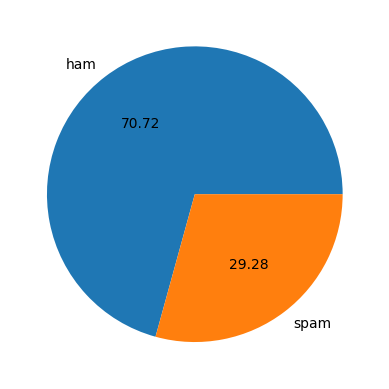

In [32]:
plt.pie(df['label_num'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=3)

In [34]:
from sklearn.feature_extraction.text import  CountVectorizer
cv=CountVectorizer()
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

100.0


c:\Users\sherm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
prediction_test = lr.predict(x_test_cv)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.997997997998


In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction_test)

Text(95.72222222222221, 0.5, 'Truth')

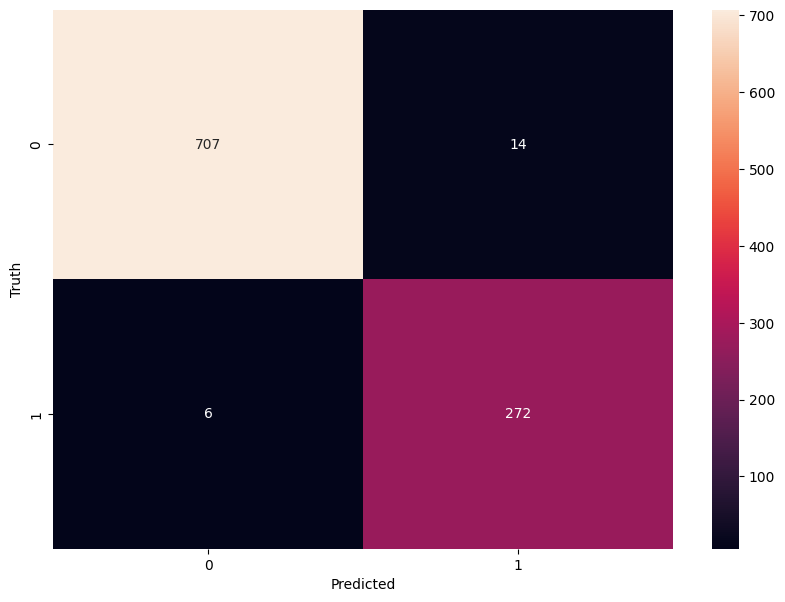

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')